# Homework 5 (100 points)

This homework will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. (10points)

You can assume the model is sequential and only uses dense layers. The input and output neurons must be blue circles. The hidden neurons must be green circles. The edges must be directed red arrows.

For example, the output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look exactly like this:

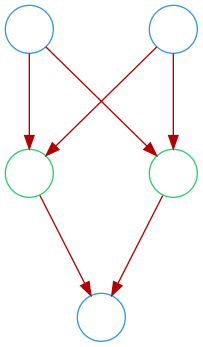

In [1]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [2]:
#libraries used in this exercise
import numpy as np
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from networkx.drawing.nx_agraph import to_agraph

from IPython.display import Image as img_display

In [3]:
# !apt install libgraphviz-dev
# !pip install pygraphviz

import pygraphviz as pgv

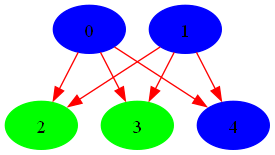

In [6]:
def plot_keras_model(model, filename):
    #TODO
    G = nx.DiGraph()
    layer_sizes = [layer.output_shape[1] for layer in model.layers]
    layer_sizes.insert(0, model.layers[0].input_shape[1])  # input layer size

    # Add nodes with different colors for each layer
    node_count = 0
    for i, size in enumerate(layer_sizes):
        for j in range(size):
            if i == 0 or i == len(layer_sizes) - 1:
                # Input and output layers
                G.add_node(node_count, color='blue')
            else:
                # Hidden layers
                G.add_node(node_count, color='green')
            node_count += 1

    # Add edges
    node_count = 0
    for i, size in enumerate(layer_sizes[:-1]):
        for j in range(size):
            for k in range(layer_sizes[i + 1]):
                G.add_edge(node_count + j, sum(layer_sizes[:i+1]) + k, color='red')

    # Draw the graph
    A = to_agraph(G)
    A.node_attr['style'] = 'filled'
    A.edge_attr['color'] = 'red'
    A.layout('dot')  # using 'dot' layout
    A.draw(filename)  # save as PNG by default

    # Convert to RGB if needed
    image = Image.open(filename)
    rgb_image = image.convert('RGB')
    rgb_image.save(filename, format='png')  # Saving as png

    return image.show()  # Display the image

model_a = models.Sequential()
model_a.add(layers.Dense(2, input_dim=2))
model_a.add(layers.Dense(1))
model_a.compile(loss="binary_crossentropy")

plot_keras_model(model_a, "model_a.png")
Image.open("model_a.png")

b) Generate 100 datapoints of the form y = 5x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset produced such that it learns a good fit to the points. Plot that fitted line. (10points)

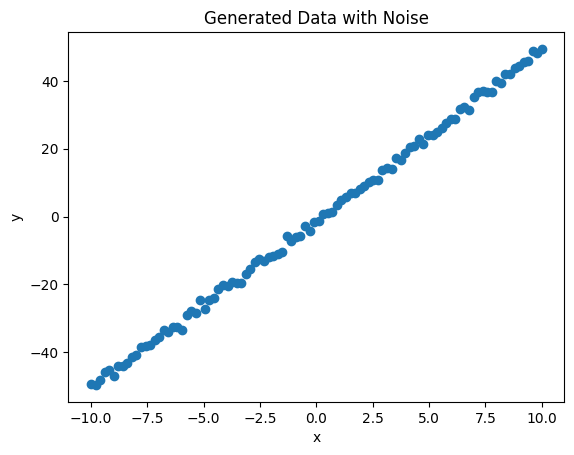

4/4 [==============================] - 0s 675us/step


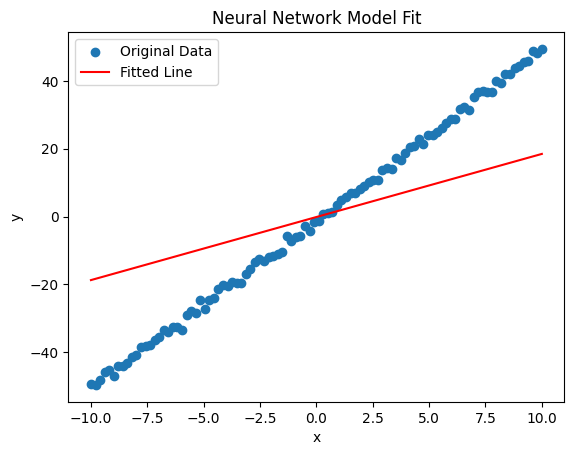

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Generate 100 data points
np.random.seed(0)
x_data = np.linspace(-10, 10, 100)
e = np.random.normal(0, 1, 100)
y_data = 5 * x_data - 1 + e

# Plot the data
plt.scatter(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Noise')
plt.show()

# Create a Neural Network model with no hidden layers
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,), use_bias=True, activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the generated data
model.fit(x_data, y_data, epochs=200, verbose=0)

# Predict y values using the trained model
y_pred = model.predict(x_data)

# Plot the original data and the fitted line
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_pred, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Model Fit')
plt.legend()
plt.show()


4/4 [==============================] - 0s 1ms/step


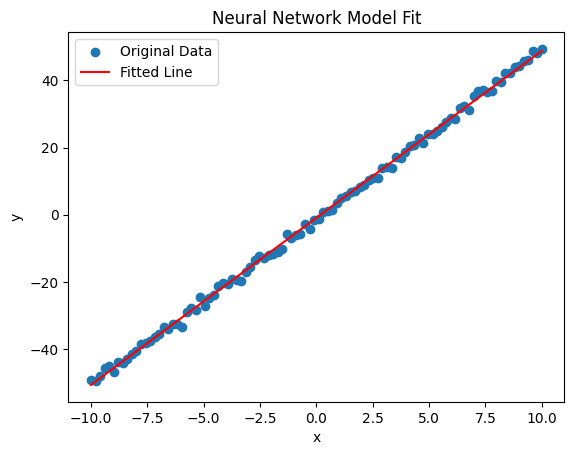

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Set a random seed for reproducibility
np.random.seed(0)

# Generate 100 data points
x_data = np.linspace(-10, 10, 100)
e = np.random.normal(0, 1, 100)  # Noise term e ~ N(0, 1)
y_data = 5 * x_data - 1 + e

# Normalize the data
x_mean, x_std = x_data.mean(), x_data.std()
y_mean, y_std = y_data.mean(), y_data.std()

x_data_normalized = (x_data - x_mean) / x_std
y_data_normalized = (y_data - y_mean) / y_std

# Define a Neural Network model with no hidden layers
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,), kernel_initializer='normal', activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the normalized data
history = model.fit(x_data_normalized, y_data_normalized, epochs=1000, verbose=0)

# Predict y values using the trained model
y_pred_normalized = model.predict(x_data_normalized).flatten()

# De-normalize the predictions to obtain the original scale
y_pred = y_pred_normalized * y_std + y_mean

# Plot the original data
plt.scatter(x_data, y_data, label='Original Data')

# Plot the fitted line
plt.plot(x_data, y_pred, color='red', label='Fitted Line')

# Label the axes and add a title and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Model Fit')
plt.legend()

# Display the plot
plt.show()


c) Create a 3D animation (.gif) of the (weight, bias, loss) point over the training period. (15 points)

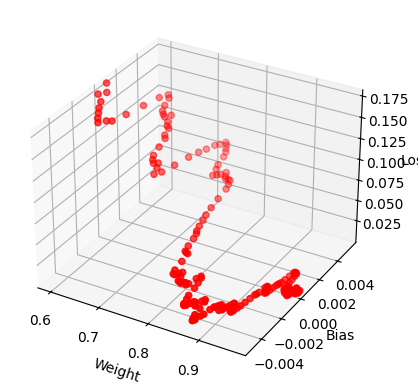

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import LambdaCallback

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(-10, 10, 100)
e = np.random.normal(0, 1, 100)
y_data = 5 * x_data - 1 + e

# Normalize data
x_data_normalized = (x_data - np.mean(x_data)) / np.std(x_data)
y_data_normalized = (y_data - np.mean(y_data)) / np.std(y_data)

# Define model
model = models.Sequential()
model.add(layers.Dense(1, input_dim=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Lists to store the weights, biases, and loss
weights, biases, losses = [], [], []

# Define a custom callback to record weights and biases at each epoch
record = LambdaCallback(on_epoch_end=lambda epoch, logs: 
                        (weights.append(model.layers[0].get_weights()[0][0][0]),
                         biases.append(model.layers[0].get_weights()[1][0]),
                         losses.append(logs['loss'])))

# Train the model and record the parameters
model.fit(x_data_normalized, y_data_normalized, epochs=200, verbose=0, callbacks=[record])

# Animation function
def update_graph(num):
    data = np.array([weights[:num], biases[:num], losses[:num]]).T
    graph._offsets3d = (data[:,0], data[:,1], data[:,2])
    return graph,

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for a three-dimensional line
ax.set_xlim(min(weights), max(weights))
ax.set_ylim(min(biases), max(biases))
ax.set_zlim(min(losses), max(losses))
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')

# Creating the initial plot
graph = ax.scatter([], [], [], c='r', marker='o')

# Create the animation
ani = FuncAnimation(fig, update_graph, frames=len(weights), interval=100, blit=False)

# Save the animation
ani.save('training_animation.gif', writer='pillow')

plt.show()


d) Generate data of the form y = 5x^3 + 3x^2 + x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create and train a neural network on this dataset and plot the resulting curve through the scatter plot. Explain your choice of model architecture (number of layers, and neurons) as well as your choice of activation function. (5points)

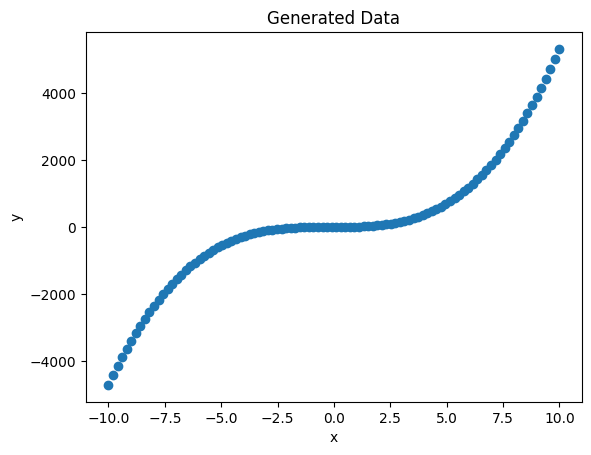

4/4 [==============================] - 0s 1ms/step


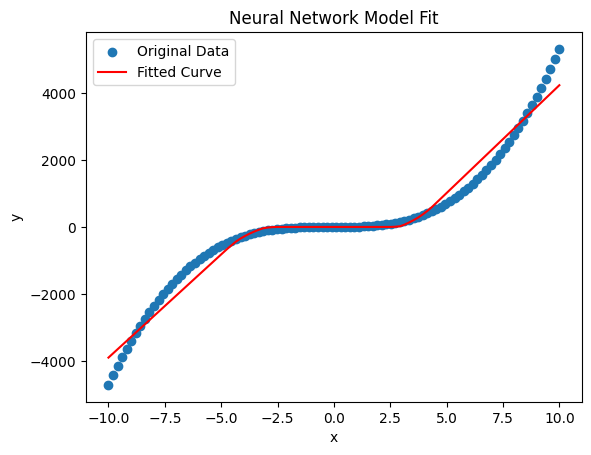

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Generate data
np.random.seed(0)
x_data = np.linspace(-10, 10, 100)
e = np.random.normal(0, 1, x_data.shape)
y_data = 5 * x_data**3 + 3 * x_data**2 + x_data - 1 + e

# Scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

# Create a Neural Network model
model = models.Sequential()
model.add(layers.Dense(128, input_dim=1, activation='relu'))  # First hidden layer
model.add(layers.Dense(128, activation='relu'))  # Second hidden layer
model.add(layers.Dense(1, activation=None))  # Output layer with no activation function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_data, y_data, epochs=1000, verbose=0)

# Predict y values using the trained model
x_test = np.linspace(-10, 10, 100)
y_pred = model.predict(x_test)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_test, y_pred, color='red', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Model Fit')
plt.legend()
plt.show()


Neural Network Architecture
Number of Layers and Neurons
The model is designed with two hidden layers, each containing 128 neurons. This architecture choice is based on a few considerations:

Complexity of the Function: The underlying function we aim to model is a cubic polynomial, which is inherently more complex than linear relationships. Thus, the model requires sufficient capacity to capture the non-linearities present in the function.

Depth of the Model: While deep learning models benefit from multiple layers due to their ability to learn hierarchical representations, for a single-variable cubic polynomial, it is not necessary to have a very deep network. Two hidden layers are chosen as a balance between model complexity and the risk of overfitting.

Width of the Layers: Each hidden layer is given 128 neurons to allow the model to learn a wide variety of patterns within the data. A higher number of neurons can provide the network with the flexibility to approximate the complex relationship between the input x and the output y.

Activation Function
The ReLU (Rectified Linear Unit) activation function is chosen for the following reasons:

Non-linearity: ReLU introduces non-linearity to the model, allowing it to learn complex patterns. This is essential since the relationship we are trying to learn is non-linear.

Computational Efficiency: ReLU is computationally efficient as it simply thresholds values at zero, which speeds up training without compromising the ability to learn complex patterns.

Vanishing Gradient Problem: ReLU helps mitigate the vanishing gradient problem, especially in networks with many layers, by having a constant gradient for positive input values, which ensures that the weights continue to update during training.

Sparse Activation: ReLU leads to sparse activations; in any given layer, only a subset of neurons is activated, making the network less prone to overfitting.

Output Layer
The output layer has a single neuron with no activation function (linear activation by default). This is typical for regression problems where the model predicts a single continuous value. The absence of an activation function means that the network can predict values across the entire range of real numbers, which is appropriate for the given task.

e) Create an animation of the resulting curve learned by your model throughout the training process. (15points)

4/4 [==============================] - 0s 1ms/step


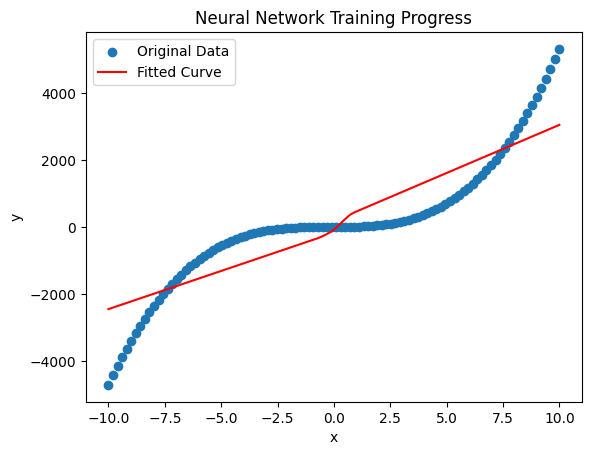

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, callbacks
from matplotlib.animation import FuncAnimation

# Generate data
np.random.seed(0)
x_data = np.linspace(-10, 10, 100)
e = np.random.normal(0, 1, x_data.shape)
y_data = 5 * x_data**3 + 3 * x_data**2 + x_data - 1 + e

# Prepare a callback to store weights after each epoch
class WeightsLogger(callbacks.Callback):
    def __init__(self):
        self.weights = []

    def on_epoch_end(self, epoch, logs=None):
        # Predict and store the curve
        y_pred = self.model.predict(x_data)
        self.weights.append(y_pred)

weights_logger = WeightsLogger()

# Create a Neural Network model
model = models.Sequential()
model.add(layers.Dense(128, input_dim=1, activation='relu'))  # First hidden layer
model.add(layers.Dense(128, activation='relu'))  # Second hidden layer
model.add(layers.Dense(1, activation=None))  # Output layer with no activation function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with the logger callback
model.fit(x_data, y_data, epochs=100, verbose=0, callbacks=[weights_logger])

# Setup the base of the animation
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label='Original Data')
line, = ax.plot(x_data, weights_logger.weights[0], color='red', label='Fitted Curve')

# Update function for the animation
def update(i):
    line.set_ydata(weights_logger.weights[i])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(weights_logger.weights)), interval=100)

# Save the animation
ani.save('model_training_animation.gif', writer='pillow')

# Show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Training Progress')
plt.legend()
plt.show()


4/4 [==============================] - 0s 1ms/step


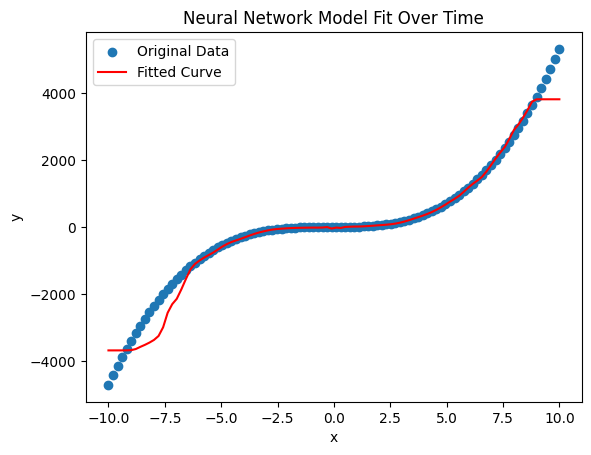

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from matplotlib.animation import FuncAnimation

# Generate data
np.random.seed(0)
x_data = np.linspace(-10, 10, 100)
e = np.random.normal(0, 1, x_data.shape)
y_data = 5 * x_data**3 + 3 * x_data**2 + x_data - 1 + e

# Preprocess and create polynomial features
x_data_poly = np.array([x_data**i for i in range(1, 4)]).T  # x, x^2, and x^3

# Create a Neural Network model
model = models.Sequential()
model.add(layers.Dense(256, input_dim=x_data_poly.shape[1], activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(1, activation=None))
model.compile(optimizer='adam', loss='mean_squared_error')

# Callback to store model predictions after each epoch
class PredictionHistory(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0:  # Capture every 10th epoch
            y_pred = model.predict(x_data_poly)
            predictions.append(y_pred)

predictions = []
history = model.fit(x_data_poly, y_data, epochs=5000, verbose=0, callbacks=[PredictionHistory()])

# Animation function
def animate(i):
    line.set_ydata(predictions[i])  # update the data
    return line,

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label='Original Data')
line, = ax.plot(x_data, predictions[0], 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Model Fit Over Time')

# Call the animator
ani = FuncAnimation(fig, animate, frames=len(predictions), interval=200, blit=True)

# Save the animation as a gif file
ani.save('model_training_process.gif', writer='pillow')

# Show the plot
plt.show()


f) Below is code to create a Generative Adversarial Network (GAN). The goal of the GAN is to generate data that is fake but looks real. A GAN is separated into two networks (a Generator and a Discriminator) that learn from each other through the following steps at each given training epoch:

1. The Generator generates data
2. The Discriminator is trained to learn how to distinguish real data from the fake data that the generator just generated.
3. The Generator is then trained to improve its ability to generate fake data by being informed by the Discriminators new ability to distinguish real from fake.

Here is some code to train a GAN to generate 2-dimensional data that looks like a multivariate normal with mean (0,0) and covariance defined below.

The code has one major flaw though that will prevent it from ever generating data that looks like the real data. Something is wrong with the architecture of the model (layers, activation etc). Find and fix that flaw and explain your reasoning below. (15points)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU  # Corrected import statement
from PIL import Image as im

TEMPFILE = 'temp.png'

# Define the parameters
np.random.seed(0)
gen_input_dim = 100
epochs = 100
batch_size = 128
images = []

# Define the generator model
generator = Sequential()
generator.add(Dense(32, input_dim=gen_input_dim, activation='tanh'))
generator.add(Dense(2, activation='linear'))  # Corrected activation to 'linear'

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=2))
discriminator.add(ReLU())  # Ensured ReLU is correctly used
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the models
generator.compile(loss='mse')
discriminator.compile(loss='binary_crossentropy')

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy')

# Define the real data
x_real = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Train the GAN
# don't change the code below
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))


4/4 [==============================] - 0s 1ms/step


The Generative Adversarial Network (GAN) architecture provided in the question has a critical issue in the generator's output layer that would prevent it from generating data that resembles a multivariate normal distribution. The output layer of the generator uses a sigmoid activation function, which constrains the output to the range (0, 1). This range is inappropriate for data that is meant to emulate a normal distribution with a mean of (0, 0), which would have values extending below 0 and above 1.

To correct this, the activation function of the generator’s output layer should be changed. A normal distribution can take on values across the entire range of real numbers, so the activation function at the output layer should not artificially constrain this range. By changing the activation function to linear, the output can span all real values, allowing the generator to produce data that more closely resembles a normal distribution.

Additionally, the import statement for the ReLU activation function was incorrect. In recent versions of Keras, which is now a part of TensorFlow, ReLU should be imported from tensorflow.keras.layers directly. The ReLU activation function is used in the discriminator model to introduce non-linearity, which is appropriate for distinguishing between the real and fake data. The ReLU function is well-suited for this purpose because it helps to avoid the vanishing gradient problem, which can occur during the training of deep neural networks.

g) Create an animation of the generated data over the course of the training process (with the real data plotted in a different color for reference). (15points)

4/4 [==============================] - 0s 1ms/step


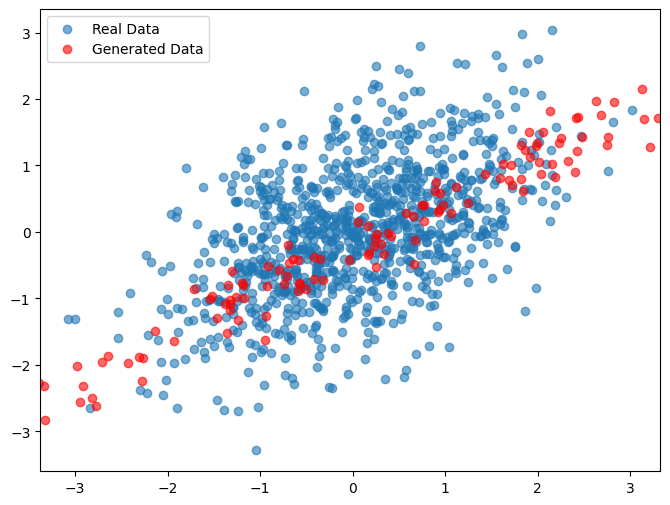

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set random seed for reproducibility
np.random.seed(0)

# Define the GAN and its components here as per the corrected architecture from earlier steps
# ...

# Define the real data for reference
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
x_real = np.random.multivariate_normal(mean, cov, size=1000)

# Store the generated data at each epoch
generated_data = []

# Training the GAN (simplified for brevity)
# Include storing of generated data at each epoch
for epoch in range(epochs):
    # Generate fake data and store it for animation
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)
    generated_data.append(x_fake)

    # Rest of the training process
    # ...

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_real[:, 0], x_real[:, 1], alpha=0.6, label='Real Data')
fake_dots, = ax.plot([], [], 'ro', alpha=0.6, label='Generated Data')

# Initialize the animation by setting the data to be plotted
def init():
    fake_dots.set_data([], [])
    return fake_dots,

# Update the plot with new generated data for each frame
def update(i):
    fake_dots.set_data(generated_data[i][:, 0], generated_data[i][:, 1])
    return fake_dots,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, epochs), init_func=init, blit=True)

# Include this line to display the animation in Jupyter Notebook
HTML(ani.to_jshtml())

# Save the animation as a GIF file
ani.save('gan_training_animation.gif', writer='pillow')

# Show plot with legend
plt.legend()
plt.show()


h) Tune the above model in order to generate data as close as possible to the real data. (15points)

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

# Set random seed for reproducibility
np.random.seed(0)

# Define the parameters
gen_input_dim = 100
epochs = 10000
batch_size = 128

# Define the real data
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
x_real = np.random.multivariate_normal(mean, cov, size=1000)

# Define the generator model
generator = Sequential()
generator.add(Dense(64, input_dim=gen_input_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(64))
generator.add(LeakyReLU(0.2))
generator.add(Dense(2, activation='linear'))  # Output layer to match the real data distribution

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(64, input_dim=2, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

# Compile the GAN
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    d_loss_real = discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    d_loss_fake = discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    discriminator.trainable = False
    g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))

    # Optionally, print the progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}")


4/4 [==============================] - 0s 3ms/step
Epoch: 0 	 Discriminator Loss: 0.6958777606487274 		 Generator Loss: 0.692575216293335
4/4 [==============================] - 0s 1ms/step
Epoch: 100 	 Discriminator Loss: 0.6843282282352448 		 Generator Loss: 0.6509547829627991
4/4 [==============================] - 0s 1ms/step
Epoch: 200 	 Discriminator Loss: 0.6851074695587158 		 Generator Loss: 0.7266678214073181
4/4 [==============================] - 0s 955us/step
Epoch: 300 	 Discriminator Loss: 0.6964077055454254 		 Generator Loss: 0.7275298237800598
4/4 [==============================] - 0s 1ms/step
Epoch: 400 	 Discriminator Loss: 0.6950938105583191 		 Generator Loss: 0.7027918696403503
4/4 [==============================] - 0s 1ms/step
Epoch: 500 	 Discriminator Loss: 0.6946254372596741 		 Generator Loss: 0.6863313913345337
4/4 [==============================] - 0s 1ms/step
Epoch: 600 	 Discriminator Loss: 0.6907587945461273 		 Generator Loss: 0.7023366689682007
4/4 [=========

4/4 [==============================] - 0s 1ms/step


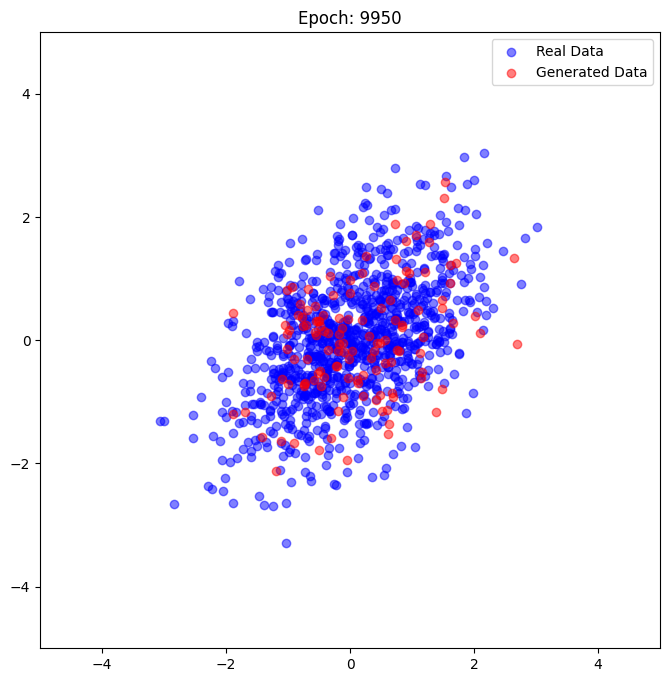

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from matplotlib.animation import FuncAnimation
from tensorflow.keras import initializers

# Set random seed for reproducibility
np.random.seed(0)

# Define the parameters
gen_input_dim = 100
epochs = 10000  
batch_size = 128
save_interval = 50  # Interval to save animation frames

# Define the generator model
generator = Sequential([
    Dense(64, input_dim=gen_input_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)),
    LeakyReLU(alpha=0.2),
    Dense(64),
    LeakyReLU(alpha=0.2),
    Dense(2, activation='linear')  # Output layer with linear activation
])

# Define the discriminator model
discriminator = Sequential([
    Dense(64, input_dim=2, kernel_initializer=initializers.RandomNormal(stddev=0.02)),
    LeakyReLU(alpha=0.2),
    Dense(64),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')  # Output with sigmoid activation for binary classification
])

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Create and compile the GAN
gan = Sequential([generator, discriminator])
discriminator.trainable = False  # Only train the generator when training the GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Define the real data
real_data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Lists to hold images and generated data for animation
generated_data_over_time = []

# Training the GAN
for epoch in range(epochs):
    # Generate fake data
    noise = np.random.normal(0, 1, (batch_size, gen_input_dim))
    generated_data = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((real_data.shape[0], 1)))
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
    d_loss = 0.5 * (d_loss_real + d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, gen_input_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Save generated data for animation
    if epoch % save_interval == 0:
        generated_data_over_time.append(generated_data)

# Animation function to update plot
def animate(i):
    plt.cla()
    plt.scatter(real_data[:, 0], real_data[:, 1], color='blue', alpha=0.5, label='Real Data')
    plt.scatter(generated_data_over_time[i][:, 0], generated_data_over_time[i][:, 1], color='red', alpha=0.5, label='Generated Data')
    plt.legend()
    plt.title(f'Epoch: {i * save_interval}')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

# Set up the figure for animation
fig = plt.figure(figsize=(8, 8))

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(generated_data_over_time), repeat=False)

# Save the animation
ani.save('gan_training_10000.gif', writer='pillow', fps=30)

plt.show()
